In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys, os
import extract as e
import structure as s
#import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from datetime import datetime
import numpy as np


In [3]:
from plotting import plots

In [4]:
import dfconvert as dfC
from dfconvert import df_store

Ipython active


In [5]:
df = df_store('data').load_df()
print(df.head())


Loading pickle: data\data...
dataframe loaded successfully
                 date      d1      d2      d3      d4    v  Year  Month  Week  \
0 2002-03-03 19:04:00  0.6100  0.6100  0.6099  0.6100  0.0  2002      3     9   
1 2002-03-03 19:05:00  0.6100  0.6100  0.6099  0.6099  0.0  2002      3     9   
2 2002-03-03 19:06:00  0.6099  0.6099  0.6099  0.6099  0.0  2002      3     9   
3 2002-03-03 19:07:00  0.6099  0.6100  0.6099  0.6100  0.0  2002      3     9   
4 2002-03-03 19:08:00  0.6099  0.6101  0.6099  0.6101  0.0  2002      3     9   

   Day  ...  Is_month_end  Is_month_start  Is_quarter_end  Is_quarter_start  \
0    3  ...         False           False           False             False   
1    3  ...         False           False           False             False   
2    3  ...         False           False           False             False   
3    3  ...         False           False           False             False   
4    3  ...         False           False           False  

In [6]:
len(df)

5449388

In [7]:
import matplotlib.pyplot as plt

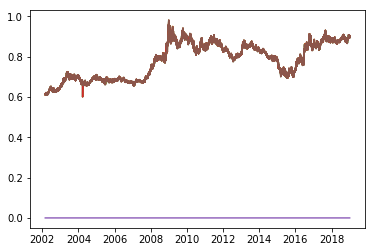

In [8]:
plots(df, None)

In [9]:
import numpy as np

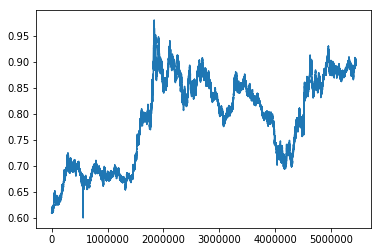

In [10]:
plt.plot(df['d3'])

In [12]:
from structure import outlier_detect

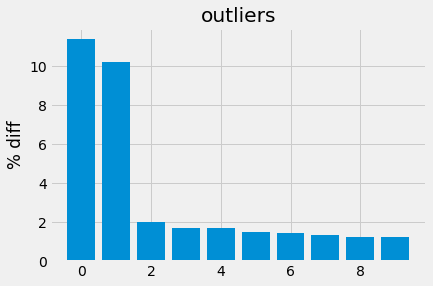

              d3     diff_t
564134   0.60000  11.399994
564135   0.66840  10.233388
4623424  0.90254   2.014316
4537095  0.82504   1.701735
4516317  0.78072   1.688188
4824010  0.84972   1.519325
1902624  0.91530   1.442148
3315239  0.85329   1.353578
4723554  0.88294   1.253767
4517619  0.81924   1.251156


In [14]:
a = outlier_detect(df, 'd3', graph = True)
print(a.outliers)


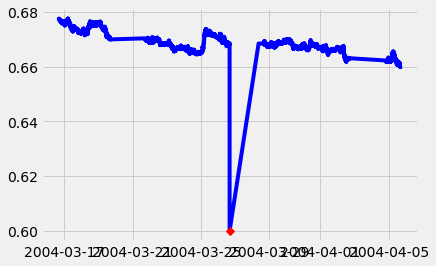

do you wish to remove this observation? (y/n/t to terminate): y


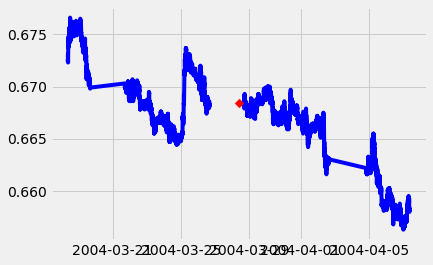

do you wish to remove this observation? (y/n/t to terminate): t


In [15]:
b = a.zoom_in(remove_option=True)


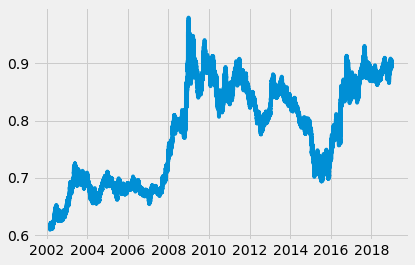

In [17]:
df = b
plots(df, ['d3'], 1)

In [18]:
subset = df.iloc[:10000].reset_index()
subset.head()

,index,date,d1,d2,d3,d4,v,Year,Month,Week,...,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,not_dupym,daysinmonth,aggdays,d1_lag-1
0,0,2002-03-03 19:04:00,0.6100,0.6100,0.6099,0.6100,0.0,2002,3,9,...,False,False,False,False,False,False,1,0,3,0.6100
1,1,2002-03-03 19:05:00,0.6100,0.6100,0.6099,0.6099,0.0,2002,3,9,...,False,False,False,False,False,False,0,0,3,0.6099
2,2,2002-03-03 19:06:00,0.6099,0.6099,0.6099,0.6099,0.0,2002,3,9,...,False,False,False,False,False,False,0,0,3,0.6099
3,3,2002-03-03 19:07:00,0.6099,0.6100,0.6099,0.6100,0.0,2002,3,9,...,False,False,False,False,False,False,0,0,3,0.6099
4,4,2002-03-03 19:08:00,0.6099,0.6101,0.6099,0.6101,0.0,2002,3,9,...,False,False,False,False,False,False,0,0,3,0.6099


In [19]:
subset.drop(['index'], axis=1)

,date,d1,d2,d3,d4,v,Year,Month,Week,Day,...,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,not_dupym,daysinmonth,aggdays,d1_lag-1
0,2002-03-03 19:04:00,0.6100,0.6100,0.6099,0.6100,0.0,2002,3,9,3,...,False,False,False,False,False,False,1,0,3,0.6100
1,2002-03-03 19:05:00,0.6100,0.6100,0.6099,0.6099,0.0,2002,3,9,3,...,False,False,False,False,False,False,0,0,3,0.6099
2,2002-03-03 19:06:00,0.6099,0.6099,0.6099,0.6099,0.0,2002,3,9,3,...,False,False,False,False,False,False,0,0,3,0.6099
3,2002-03-03 19:07:00,0.6099,0.6100,0.6099,0.6100,0.0,2002,3,9,3,...,False,False,False,False,False,False,0,0,3,0.6099
4,2002-03-03 19:08:00,0.6099,0.6101,0.6099,0.6101,0.0,2002,3,9,3,...,False,False,False,False,False,False,0,0,3,0.6099
5,2002-03-03 19:09:00,0.6099,0.6100,0.6099,0.6100,0.0,2002,3,9,3,...,False,False,False,False,False,False,0,0,3,0.6101
6,2002-03-03 19:10:00,0.6101,0.6101,0.6100,0.6101,0.0,2002,3,9,3,...,False,False,False,False,False,False,0,0,3,0.6101
7,2002-03-03 19:11:00,0.6101,0.6101,0.6100,0.6100,0.0,2002,3,9,3,...,False,False,False,False,False,False,0,0,3,0.6101
8,2002-03-03 19:12:00,0.6101,0.6101,0.6100,0.6100,0.0,2002,3,9,3,...,False,False,False,False,False,False,0,0,3,0.6099
9,2002-03-03 19:13:00,0.6099,0.6099,0.6099,0.6099,0.0,2002,3,9,3,...,False,False,False,False,False,False,0,0,3,0.6099


In [20]:
subset = s.add_rand(subset)
subset.head()

,index,date,d1,d2,d3,d4,v,Year,Month,Week,...,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,not_dupym,daysinmonth,aggdays,d1_lag-1,randseries
0,0,2002-03-03 19:04:00,0.6100,0.6100,0.6099,0.6100,0.0,2002,3,9,...,False,False,False,False,False,1,0,3,0.6100,0.656623
1,1,2002-03-03 19:05:00,0.6100,0.6100,0.6099,0.6099,0.0,2002,3,9,...,False,False,False,False,False,0,0,3,0.6099,0.508546
2,2,2002-03-03 19:06:00,0.6099,0.6099,0.6099,0.6099,0.0,2002,3,9,...,False,False,False,False,False,0,0,3,0.6099,0.725449
3,3,2002-03-03 19:07:00,0.6099,0.6100,0.6099,0.6100,0.0,2002,3,9,...,False,False,False,False,False,0,0,3,0.6099,0.035591
4,4,2002-03-03 19:08:00,0.6099,0.6101,0.6099,0.6101,0.0,2002,3,9,...,False,False,False,False,False,0,0,3,0.6099,0.692801


In [21]:
#subset['mean'] = subset.mean(numeric_only=True, axis=1)
subset['mean'] =  df.loc[:,"d1"].mean()

In [78]:
subset.columns

Index(['index', 'date', 'd1', 'd2', 'd3', 'd4', 'v', 'Year', 'Month', 'Week',
       'Day', 'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start',
       'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start',
       'not_dupym', 'daysinmonth', 'aggdays', 'd1_lag-1', 'randseries',
       'mean'],
      dtype='object')

In [22]:
subset['mean'].head()

0    0.780101
1    0.780101
2    0.780101
3    0.780101
4    0.780101
Name: mean, dtype: float64

In [23]:
features = pd.get_dummies(subset)

In [24]:
features.iloc[:, 5:20].head()

,d4,v,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,not_dupym
0,0.6100,0.0,2002,3,9,3,6,62,False,False,False,False,False,False,1
1,0.6099,0.0,2002,3,9,3,6,62,False,False,False,False,False,False,0
2,0.6099,0.0,2002,3,9,3,6,62,False,False,False,False,False,False,0
3,0.6100,0.0,2002,3,9,3,6,62,False,False,False,False,False,False,0
4,0.6101,0.0,2002,3,9,3,6,62,False,False,False,False,False,False,0


In [25]:
def drop_col(df, col_names):
    for col in col_names:
        if col in df.columns:
            df = df.drop(col, axis = 1)
    return df

features = drop_col(features, ['date', 'd2', 'd3', 'd4', 'index', 'd1_lag-1'])

In [26]:
features.head()

,d1,v,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,not_dupym,daysinmonth,aggdays,randseries,mean
0,0.6100,0.0,2002,3,9,3,6,62,False,False,False,False,False,False,1,0,3,0.656623,0.780101
1,0.6100,0.0,2002,3,9,3,6,62,False,False,False,False,False,False,0,0,3,0.508546,0.780101
2,0.6099,0.0,2002,3,9,3,6,62,False,False,False,False,False,False,0,0,3,0.725449,0.780101
3,0.6099,0.0,2002,3,9,3,6,62,False,False,False,False,False,False,0,0,3,0.035591,0.780101
4,0.6099,0.0,2002,3,9,3,6,62,False,False,False,False,False,False,0,0,3,0.692801,0.780101


In [27]:
if 'd1' in features:
    labels = np.array(features['d1'])
    features = features.drop('d1', axis = 1)
elif 'rnd' in features:
    labels = np.array(features['rnd'])
    features = features.drop('rnd', axis = 1)

feature_list = list(features.columns)
print(feature_list)
features = np.array(features)

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state=42)
print(train_features.shape)
print(test_features.shape)
print(train_labels.shape)
print(test_labels.shape)

['v', 'Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'not_dupym', 'daysinmonth', 'aggdays', 'randseries', 'mean']
(7500, 18)
(2500, 18)
(7500,)
(2500,)


In [28]:
#historical average
baseline_preds = test_features[:,feature_list.index('mean')]
print(baseline_preds)
baseline_errors = abs(baseline_preds - test_labels)
baseline_errors[:10]


[0.7801008224487305 0.7801008224487305 0.7801008224487305 ...
 0.7801008224487305 0.7801008224487305 0.7801008224487305]


array([0.16140079498291016, 0.16440081596374512, 0.1690008044242859,
       0.16460084915161133, 0.16390085220336914, 0.16120082139968872,
       0.16980081796646118, 0.16360080242156982, 0.16130083799362183,
       0.17030084133148193], dtype=object)

In [29]:
print('av basline error: ', round(np.mean(baseline_errors), 2))


av basline error:  0.16


In [30]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=5, max_depth=50, n_jobs=-1)
rf.fit(train_features, train_labels)
predictions = rf.predict(test_features)
errors = abs(predictions - test_labels)
print('mean absolute error: ', np.mean(errors), 'degrees.')


mean absolute error:  0.0006854919635459147 degrees.


In [31]:
mape = 100 * (errors / test_labels)
accuracy = 100 - np.mean(mape)
print('accuracy:', round(accuracy, 2), '%.')

accuracy: 99.89 %.


In [32]:
importances = list(rf.feature_importances_)
print(importances)
feature_importances = [(feature, importance) for feature, importance in zip (feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('variable: {:20} importance : {}'.format(*pair)) for pair in feature_importances]

[0.0, 0.0, 0.0, 0.45700577072259796, 0.032853122524071174, 0.009126350901571068, 0.22033587446516342, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.22212411552810782, 0.05855476585848862, 0.0]
variable: Week                 importance : 0.45700577072259796
variable: aggdays              importance : 0.22212411552810782
variable: Dayofyear            importance : 0.22033587446516342
variable: randseries           importance : 0.05855476585848862
variable: Day                  importance : 0.032853122524071174
variable: Dayofweek            importance : 0.009126350901571068
variable: v                    importance : 0.0
variable: Year                 importance : 0.0
variable: Month                importance : 0.0
variable: Is_month_end         importance : 0.0
variable: Is_month_start       importance : 0.0
variable: Is_quarter_end       importance : 0.0
variable: Is_quarter_start     importance : 0.0
variable: Is_year_end          importance : 0.0
variable: Is_year_start        importance

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [33]:
important_indices = [feature_list.index('Dayofweek'), feature_list.index('mean')]
train_important=train_features[:,important_indices]
test_important=test_features[:,important_indices]
rf.fit(train_important, train_labels)
predictions= rf.predict(test_important)
errors = abs(predictions-test_labels)
print(errors)

[0.00293974 0.00053703 0.00466027 ... 0.00206827 0.00256829 0.00499451]


In [34]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'var importance')

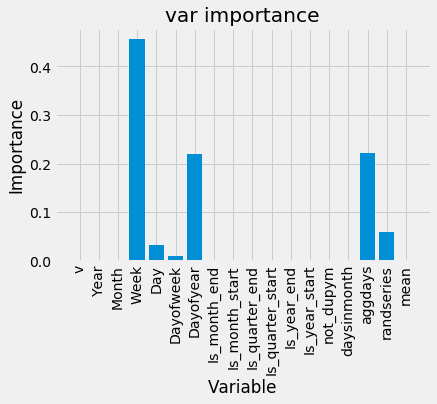

In [35]:
plt.style.use('fivethirtyeight')
x_values=list(range(len(importances)))
plt.bar(x_values, importances, orientation='vertical')
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('var importance')



In [119]:
test_features.shape

(2500, 18)

In [126]:
years = test_features[:, feature_list.index('Year')]
months = test_features[:, feature_list.index('Month')]
days = test_features[:, feature_list.index('Day')]
print("YEARS: " , years)
print("MONTHS: " , months)
print("DAYS: " , days)



YEARS:  [2002 2002 2002 ... 2002 2002 2002]
MONTHS:  [3 3 3 ... 3 3 3]
DAYS:  [12 11 5 ... 13 13 3]


In [128]:
np.unique(test_features[:, feature_list.index('Year')])

array([2002], dtype=object)

In [129]:
a=list(zip(years, months, days))
print(a)

[(2002, 3, 12), (2002, 3, 11), (2002, 3, 5), (2002, 3, 11), (2002, 3, 11), (2002, 3, 12), (2002, 3, 4), (2002, 3, 11), (2002, 3, 12), (2002, 3, 4), (2002, 3, 5), (2002, 3, 13), (2002, 3, 11), (2002, 3, 12), (2002, 3, 6), (2002, 3, 12), (2002, 3, 4), (2002, 3, 19), (2002, 3, 13), (2002, 3, 17), (2002, 3, 19), (2002, 3, 5), (2002, 3, 11), (2002, 3, 19), (2002, 3, 11), (2002, 3, 19), (2002, 3, 5), (2002, 3, 18), (2002, 3, 12), (2002, 3, 18), (2002, 3, 4), (2002, 3, 5), (2002, 3, 11), (2002, 3, 11), (2002, 3, 18), (2002, 3, 6), (2002, 3, 12), (2002, 3, 4), (2002, 3, 6), (2002, 3, 12), (2002, 3, 12), (2002, 3, 3), (2002, 3, 18), (2002, 3, 5), (2002, 3, 18), (2002, 3, 3), (2002, 3, 11), (2002, 3, 6), (2002, 3, 5), (2002, 3, 5), (2002, 3, 6), (2002, 3, 18), (2002, 3, 11), (2002, 3, 17), (2002, 3, 6), (2002, 3, 13), (2002, 3, 6), (2002, 3, 19), (2002, 3, 5), (2002, 3, 5), (2002, 3, 4), (2002, 3, 13), (2002, 3, 12), (2002, 3, 3), (2002, 3, 4), (2002, 3, 17), (2002, 3, 5), (2002, 3, 19), (2002, 

In [131]:
import datetime

In [140]:
test_dates = [str(int(year)) + '-' + str(int(month))+'-' + str(int(day)) for year, month, day in zip(years, months, days)]

test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]
prediction_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})


NameError: name 'predictions_data' is not defined

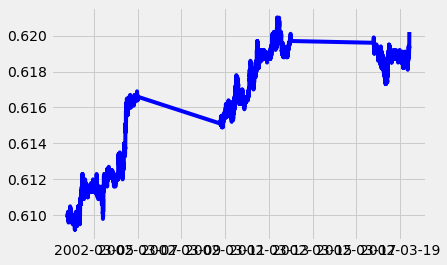

In [141]:
# Plot the actual values
plt.plot(subset['date'], subset['d1'], 'b-', label = 'actual')
# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()
# Graph labels
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and Predicted Values');